# 2016 US Bike Share Activity Snapshot
> By Soumia Zohra El Mestari 

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction


Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project,I  performed an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. I  compared the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions
Q1 ) What are the propotions of each user category(female/male/young/adult..) in each region ? (This helps to make smart decisions in investing to provide certain types of bicycles , for example : if in region A most of your users are females then it's a clever choice to consider adding more WSD(women specific design) bikes as in general women's physique have different shapes than the average man physique ) 
<br><br>
Q2) In each region what are the propotions of each user type (subscriber/ customer...) ? (This can help conduct further studies to learn more about the user's decisions and therefore spot the disturbing effects that influence the user's decisions , to stay just a customer for example )
<br><br>
Q3) In each region what are the parts of the day in which a high usage rate is recorded ? (This helps to identify where and when should the company consider adding more bicycles to certain stations in order to tagrget a larger group of users).
<br><br>
Q4) How is the rate of the bike's usage is evolving throughout the years in each region ? ( This gives a global overview of the business growth)
<br><br>
Q5 ) How many time(duration) each user is spending on the bike per year ? (results can be grouped per gender/region/time of the day ( morning , night ....) in order to spot trends which can influence the business growth , and with further studies we can undertsand the reasons behind this behaviour and take action to enhance the service )


<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed . In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 


In [1]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.
import operator 

In [21]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    INPUT :
        filename(string): path of the data file 
    OUTPUT : 
        second row in the file 
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = next(trip_reader)
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        pprint(first_trip)
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [22]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    
    # YOUR CODE HERE
    if (city == 'NYC') or (city == 'Chicago'):
        duration = int(datum['tripduration']) / 60 #conversion from seconds to minutes
    else : #if it's not NYC or Chicago then it's  Washington 
        duration = int(datum['Duration (ms)']) / 60000 #conversion from millisecondes to minutes
    return duration


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001
 
#tests 
print('Duration in minutes results for Chicago {} , the correct value is {} '.format(duration_in_mins(example_trips['Chicago'], 'Chicago'),tests['Chicago']))
print('Duration in minutes results for NYC {} , the correct value is {} '.format(duration_in_mins(example_trips['NYC'], 'NYC'),tests['NYC']))
print('Duration in minutes results for Washington {} , the correct value is {} '.format(duration_in_mins(example_trips['Washington'], 'Washington'),tests['Washington']))


Duration in minutes results for Chicago 15.433333333333334 , the correct value is 15.4333 
Duration in minutes results for NYC 13.983333333333333 , the correct value is 13.9833 
Duration in minutes results for Washington 7.123116666666666 , the correct value is 7.1231 


In [4]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    # YOUR CODE HERE
    date_format,attribute_key = None,None
    #date_format specifies the patterns in which the date is formatted 
    
    if city == 'NYC':
        date_format = '%m/%d/%Y %H:%M:%S'
        attribute_key = 'starttime'
    elif city == 'Chicago':
        date_format = '%m/%d/%Y %H:%M'
        attribute_key = 'starttime'
    else :#if not Chicago and not NYC then it's Washington
        date_format = '%m/%d/%Y %H:%M'
        attribute_key = 'Start date'
    
    month = datetime.strptime(datum[attribute_key],date_format).month
    hour = datetime.strptime(datum[attribute_key],date_format).hour
    day_of_week = datetime.strptime(datum[attribute_key],date_format).strftime('%A')   

    return (month, hour, day_of_week)


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]
                      
print('Time format results for Chicago {} , the correct value is {} '.format(time_of_trip(example_trips['Chicago'], 'Chicago'),tests['Chicago']))
print('Time format results results for NYC {} , the correct value is {} '.format(time_of_trip(example_trips['NYC'], 'NYC'),tests['NYC']))
print('Time format results results for Washington {} , the correct value is {} '.format(time_of_trip(example_trips['Washington'], 'Washington'),tests['Washington']))


Time format results for Chicago (3, 23, 'Thursday') , the correct value is (3, 23, 'Thursday') 
Time format results results for NYC (1, 0, 'Friday') , the correct value is (1, 0, 'Friday') 
Time format results results for Washington (3, 22, 'Thursday') , the correct value is (3, 22, 'Thursday') 


In [23]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    # YOUR CODE HERE
    if city == 'Washington':
        if(datum['Member Type'] == 'Registered'):
            user_type = 'Subscriber'
        else:
            user_type = 'Customer'
    else :
        user_type = datum['usertype']
        
    
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]
    
print('User type results for Chicago {} , the correct value is {} '.format( type_of_user(example_trips['Chicago'], 'Chicago'),tests['Chicago']))
print('User type result for NYC {} , the correct value is {} '.format( type_of_user(example_trips['NYC'], 'NYC'),tests['NYC']))
print('User type result for Washington {} , the correct value is {} '.format( type_of_user(example_trips['Washington'], 'Washington'),tests['Washington']))


User type results for Chicago Subscriber , the correct value is Subscriber 
User type result for NYC Customer , the correct value is Customer 
User type result for Washington Subscriber , the correct value is Subscriber 


**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [24]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = list(csv.DictReader(f_in))

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}
            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            new_point[out_colnames[0]] = duration_in_mins(row, city)
            new_point[out_colnames [1]], new_point[out_colnames [2]], new_point[out_colnames[3]] = time_of_trip(row, city) 
            new_point[out_colnames[4]] = type_of_user(row, city)


            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(new_point)
            

In [25]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.123116666666666'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.433333333333334'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.983333333333333'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


<a id='eda'></a>
## Exploratory Data Analysis

Now that we have the data collected and wrangled, we're ready to start exploring the data. In this section I  wrote some code to compute descriptive statistics from the data.
<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: Based on the execution of the following two cells : 
<br>
**Answer 1 :** the city that has the hightest number of trips is NYC 
<br>
**Answer 2 :** the city that has the hightest proportion of trips made by subscribers is  NYC
<br>
**Answer 3 :** the city that has the hightest the highest proportion of trips made by short-term customers is Chicago 

In [26]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total)

In [27]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##
trips_count = {}
subscribers_propotion = {}
customers_propotion = {}
data_files = ('./data/Chicago-2016-Summary.csv','\
./data/NYC-2016-Summary.csv','./data/Washington-2016-Summary.csv')
for data_file in data_files:
    city = data_file.split('-')[0].split('/')[-1]
    a = number_of_trips(data_file)[0] / number_of_trips(data_file)[2]
    b = number_of_trips(data_file)[1] / number_of_trips(data_file)[2]
    
    subscribers_propotion [city],customers_propotion[city],trips_count[city] = a,b,number_of_trips(data_file)[2]
    
print('the city that has the hightest number of trips is {} with a total of {} trip '.format(max(trips_count.items(),key=operator.itemgetter(1))[0],max(trips_count.items(),key=operator.itemgetter(1))[1]))
print('the city that has the hightest proportion of trips made by subscribers is  {} with a propotion of {} '.format(max(subscribers_propotion.items(),key=operator.itemgetter(1))[0],max(subscribers_propotion.items(),key=operator.itemgetter(1))[1]))   
print('the city that has the hightest the highest proportion of trips made by short-term customers is {} with a propotion up to {} '.format(max(customers_propotion.items(),key=operator.itemgetter(1))[0],max(customers_propotion.items(),key=operator.itemgetter(1))[1]))

the city that has the hightest number of trips is NYC with a total of 276798 trip 
the city that has the hightest proportion of trips made by subscribers is  NYC with a propotion of 0.8883590199351151 
the city that has the hightest the highest proportion of trips made by short-term customers is Chicago with a propotion up to 0.23774798630269925 



Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes ?

**Answer**:<br>
**Washington city** : The average trip length = 18.93 minutes <br> proportion of rides made in each city are longer than 30 minutes =10.83 %
<br>
**Chicago city** : The average trip length = 16.56 minutes <br> proportion of rides made in each city are longer than 30 minutes =8.33 %
<br>
**NYC** :The average trip length = 15.81 minutes <br> proportion of rides made in each city are longer than 30 minutes =7.30%

In [28]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                      ##
def average_and_charged_propotion(filename):
    """
    this function takes as an input a filename ( path) for a given city and returns: 
    - the average trip length for each city
    and
    -proportion of rides made in each city are longer than 30 minutes
    """
    trips_durations = []
    charged_trips = 0
    with open(filename,'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            trip_duration = float(row['duration'])
            trips_durations.append(trip_duration)
            if trip_duration > 30:
                charged_trips += 1
    average = sum(trips_durations)/len(trips_durations)
    charged_rides_propotion = (charged_trips/len(trips_durations)) *100
    return average,charged_rides_propotion

#test 
print('-----------partial test ----------------------------')
filename = './examples/BayArea-Y3-Summary.csv'
a,b = average_and_charged_propotion(filename )
print('results \n average trip length for Bay Area : {} minutes while the correct average is 14 minutes '.format(round(a,2)))
            
print('proportion of rides made in Bay area that  are longer than 30 minutes is : {}% while the correct average is 3.5%'.format(round(b,2)))      

#now we answer the Question 4b for each city 
def average_and_charged_propotion_per_city(data_files):
    result = []
    for file in data_files:
        city_info = {}
        city=file.split('-')[0].split('/')[-1]
        city_info['city_name'] = city
        city_info['avg_trip_duration'],city_info['charged_ride_propotion'] = average_and_charged_propotion(file)
        result.append(city_info)
    return result

data_files = ('./data/Chicago-2016-Summary.csv','./data/NYC-2016-Summary.csv','./data/Washington-2016-Summary.csv')

print('--------------------------------------question 4b results---------------------------------')
print(average_and_charged_propotion_per_city(data_files))

-----------partial test ----------------------------
results 
 average trip length for Bay Area : 14.04 minutes while the correct average is 14 minutes 
proportion of rides made in Bay area that  are longer than 30 minutes is : 3.52% while the correct average is 3.5%
--------------------------------------question 4b results---------------------------------
[{'city_name': 'Chicago', 'avg_trip_duration': 16.563629368787335, 'charged_ride_propotion': 8.332062497400562}, {'city_name': 'NYC', 'avg_trip_duration': 15.81259299802294, 'charged_ride_propotion': 7.3024371563378345}, {'city_name': 'Washington', 'avg_trip_duration': 18.93287355913721, 'charged_ride_propotion': 10.83888671109369}]


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: 
<br> 
**chosen city**  : Washington
<br>
**User type that took the longer rides on average:** Subscribers

In [29]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##
def average_rides_users(filename):
    """
    This function takes as Input the path of the file where the rides informations of a certain
    city are stored and then returns a dict that have for each user type the average trip duration
    """
    sub_count,cust_count = 0,0 #the number of subscribers and customers
    result = {'Subscriber':0,'Customer':0}
    with open(filename,'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            if row['user_type']=='Subscriber':
                sub_count +=1
                result['Subscriber'] += float(row['duration'])
            else:#if not a subscriber then it's a customer 
                cust_count +=1
                result['Customer'] += float(row['duration'])
    result['Subscriber'] = result['Subscriber'] / sub_count
    result['Customer'] = result['Customer'] / cust_count
    return result
#In this section we will test this function on Bay area 
file = './examples/BayArea-Y3-Summary.csv'
print('the correct results for Bay Area : \n Average of subscriber trip duration is 9.5 minutes \n and the average of customer trip duration is 54.6 minutes ')
print('the function returned for Bay Area :')
result = average_rides_users(file)
print('Average of subscriber trip duration is {} minutes \n and the average of customer trip duration is {} minutes'.format(round(result['Subscriber'],1),round(result['Customer'],1)))            
print('------------------------------------------------------------------')
# Now we will test for Washington city to answer the question 4c
file = './data/Washington-2016-Summary.csv'
result = average_rides_users(file)
max_rides_user = max(result)
print('For Washington city The type of users that has the longer rides on average is {} with an average of {} minutes'.format(max_rides_user,round(result[max_rides_user],2)))


the correct results for Bay Area : 
 Average of subscriber trip duration is 9.5 minutes 
 and the average of customer trip duration is 54.6 minutes 
the function returned for Bay Area :
Average of subscriber trip duration is 9.5 minutes 
 and the average of customer trip duration is 54.6 minutes
------------------------------------------------------------------
For Washington city The type of users that has the longer rides on average is Subscriber with an average of 12.53 minutes


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

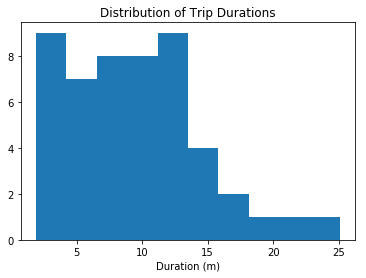

In [30]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

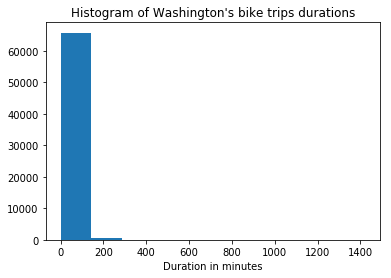

In [31]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##
#selected city is Washington 
#trip times <=> trip start time
file = './data/Washington-2016-Summary.csv'
def plot_trip_times(file_path,plot_title,x_label,y_label):
    times = []
    with open(file_path,'r') as f :
        reader = csv.DictReader(f)
        for row in reader:
            times.append(round(float(row['duration']),2))
    plt.hist(times)               
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
                         
plot_trip_times(file,'Histogram of Washington\'s bike trips durations','Duration in minutes','')


If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: <br>
**For the subscribers distribution** : <br>
-The peak approches to the value of 17500 trips which corresponds to the trips that last from 5 to 10 minutes long.
-The shape of this Distribution : this ditribution is **nearly** right skewed with the majority of the values lay between 0 to 15 minutes 
<br>
**For the customers distribution** : <br>
-The peak approches to the value of 2000 trips which corresponds to the trips that last from 15 to 20 minutes long , In other words the mode = [15,20] minutes  
-The shape of this Distribution : this ditribution doesn't have a specific shape, meanwhile we can mention that most values lay between 5 to 35 minutes 




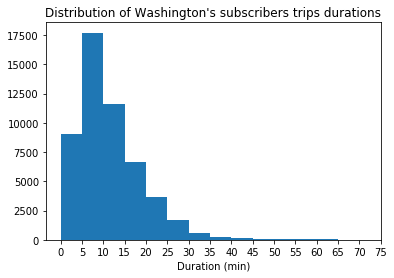

---------------------------------------------------------------


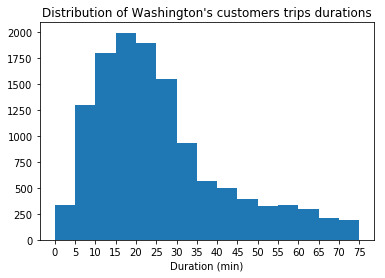

In [14]:
## Use this and additional cells to answer Question 5. ##
# SELECTED CITY is Washigton 
def trip_times_by_user_type(file_path,user_type):
    """"
    This function returns the bike trips durations for a certain user type in a certain city
    INPUT : file path(string) : the path of the file that includes informations about bike trips in a given city
            user_type(string) : the type of users 
    OUTPUT : times (list) : a list of all trips duration taken by a cetain type of users in a certain city 
    """"
    times = []
    with open(file_path,'r') as f :
        reader = csv.DictReader(f)
        for row in reader:
            if row['user_type'] == user_type:
                times.append(round(float(row['duration']),2))
    return times
#file path of Washigton's bike trips informations   
file_path = './data/Washington-2016-Summary.csv'
sub_trip_times = trip_times_by_user_type(file_path,'Subscriber') 
cust_trip_times = trip_times_by_user_type(file_path,'Customer') 
# we plot the results 
# for Washington's subscribers distribution

# BELOW : we have 75/5=15 so here we are filling bins with a set of elements
# from an arithmetic sequence with a distance = 5 between each consecutive terms 
# this is to satisfy the condition of having a 5 minutes bar width
bins = [5*i for i in range(15)]
plt.hist(sub_trip_times,bins,range=(0,75))  
plt.xticks(range(0,80,5))# this is used to set locations labels in the X-axis 
plt.title('Distribution of Washington\'s subscribers trips durations')
plt.xlabel('Duration (min)')
plt.show()

print('---------------------------------------------------------------')
# here another way to have a 5 minutes bar width <=> just sit the number of bars which is 15
plt.hist(cust_trip_times,bins=15,range=(0,75))
plt.xticks(range(0,80,5)) # this is used to set locations labels in the X-axis 
plt.title('Distribution of Washington\'s customers trips durations')
plt.xlabel('Duration (min)')
plt.show()



<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**:
All answers are extracted from running the code in cell below and observing the visualizations 
 <br>
**Question 1 :** How does ridership differ by month or season in each city ? <br>
**Answer 1:** <br>
__For Chicago__ : the distribution of the total bike rides over the months is slightly symetric as it starts with low levels in January and the rates then keeps improuving until geting its maximum rates by July , from july till December the rates decreses again <br>
__For NYC__ : the Distribution doesn't have a specific shape and the rates sway up and down during the months<br>
__For Washington__ : the Distribution doesn't have a specific shape but it's worth mentionning that the rate significally reaches high levels in the period from June till October
<br>
**Question 2** : Which month / season has the highest ridership in each city ?<br>
**Answer2** : <br>
__For Chicago__ : As a global view the month that has the hightest ridership rate is : July<br>
Meanwhile if we take a look at users types :<br>
The month that has the hightest ridership in terms of subscribers is : June <br>
The month that has the hightest ridership in terms of subscribers is : July <br>
__For NYC__ : As a global view the month that has the hightest ridership rate is : September<br>
Meanwhile if we take a look at users types :<br>
The month that has the hightest ridership in terms of subscribers is : October  <br>
The month that has the hightest ridership in terms of subscribers is : August<br>
__For Washington__ : As a global view the month that has the hightest ridership rate is : July<br>
Meanwhile if we take a look at users types :<br>
The month that has the hightest ridership in terms of subscribers is : June <br>
The month that has the hightest ridership in terms of subscribers is : July<br>
In terms of Seasons : <br> 
Both Chicago and Washigton recorded the hightests levels in bike rides during Summer months (from June to August) 
while NYC recorded its peaks during  the late summer to Automn (From August to November ) 
<br>
**Question 3**: How does the ratio of Subscriber trips to Customer trips change  in each of the three cities ? 
__For Chicago__ : From January to May ratio increases which means in this period we have more subscribers than customers <br>
the rate goes down in June as the number of customers gets higher than the number of subscribers 
<br> 
From July to December the ratio follows a decending evoloution to reach its lowest levels by December 
__For NYC__ : The ratio keeps fluctuating up and down multiple times during the year 
<br>
__For Wahsington__ : The ratio gets it's hightest peak in July , except for July the evolution is smooth and doesn't follow a dramatic falls and ups 
**Conclusion** : the peak season is generally Summer , or the late Summer till Automn , And the rates fall down in Winter ; this result is not suprising because people find it hard to use bikes during Winter due to the harsh weather conditions in this season.  

results for Chicago
 the month that has the hightest ridership rate is : July
 the month that has the hightest ridership in terms of subscribers is : June
 the month that has the hightest ridership in terms of Customers is : July
visualisations....


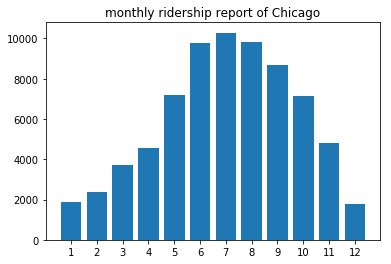

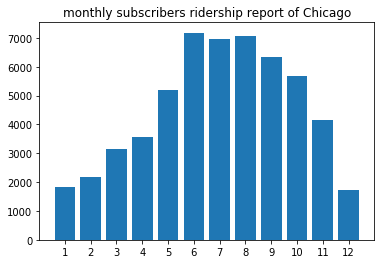

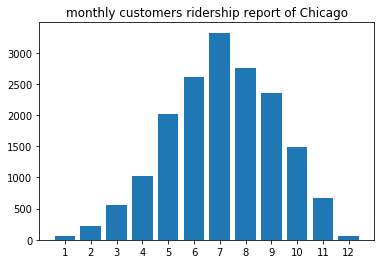

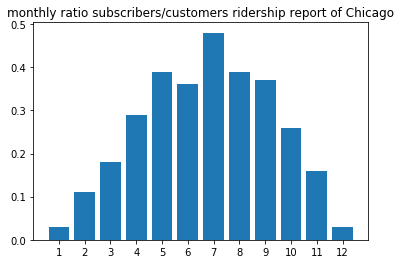

---------------------------------------------------------------------------------------------------

results for NYC
 the month that has the hightest ridership rate is : September
 the month that has the hightest ridership in terms of subscribers is : October
 the month that has the hightest ridership in terms of Customers is : August
visualisations....


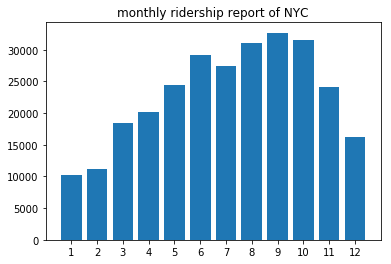

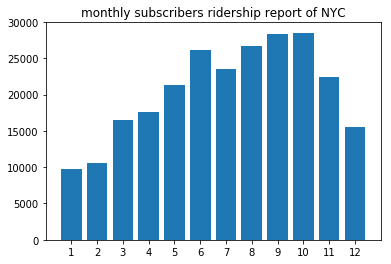

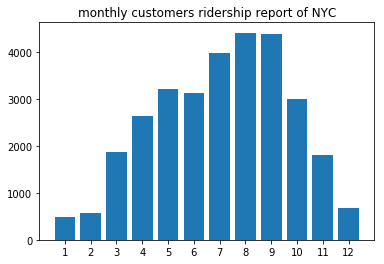

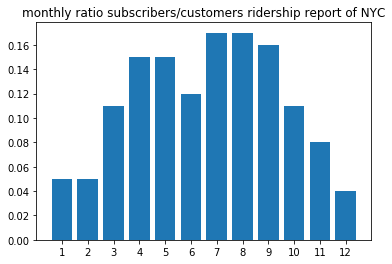

---------------------------------------------------------------------------------------------------

results for Washington
 the month that has the hightest ridership rate is : July
 the month that has the hightest ridership in terms of subscribers is : June
 the month that has the hightest ridership in terms of Customers is : July
visualisations....


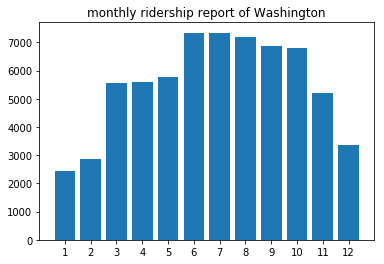

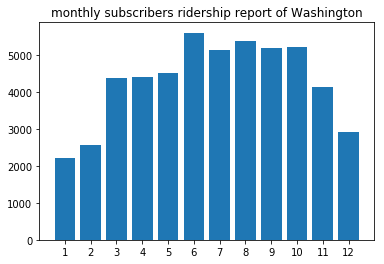

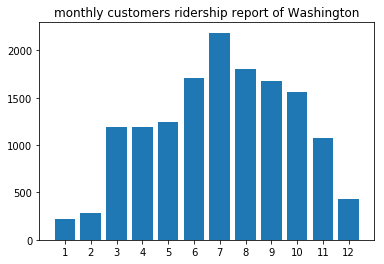

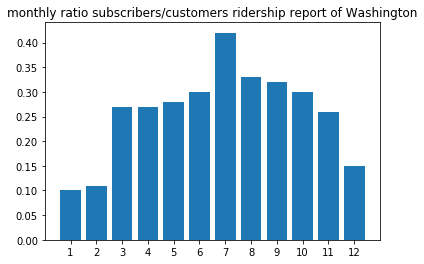

---------------------------------------------------------------------------------------------------



In [34]:
import calendar as cal
def ridership_by_month(file_path):
    """
    This function takes as an input a ridership informations file of a certain city
    and returns :
    month_stats : Dict{month : number_of_trips}
    mode_month : String => the month that has the hightest ridership 
    mode_month_custs : String => the month that has the hightest ridership for Customers
    mode_month_sub : String => the month that has the hightest ridership for Subscribers
    ratio_cust_sub : Dict => {month : ratio} for each month what is the ratio customers/subscribers 
    """
    month_stats = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}
    month_cust_trips= {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}
    month_sub_trips= {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}

    with open(file_path,'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            month_stats[int(row['month'])] += 1
            if row['user_type'] == 'Customer':
                month_cust_trips[int(row['month'])] += 1
            else:
                month_sub_trips[int(row['month'])] += 1 
    
    ratio_cust_sub = {i: round((month_cust_trips[i]/month_sub_trips[i]),2) for i in month_cust_trips} 
    mode_month = cal.month_name[max(month_stats.items(), key=operator.itemgetter(1))[0]]
    mode_month_custs = cal.month_name[max(month_cust_trips.items(), key=operator.itemgetter(1))[0]]
    mode_month_sub = cal.month_name[max(month_sub_trips.items(), key=operator.itemgetter(1))[0]]
    return {'mode_month':mode_month,'mode_custs':mode_month_custs,'mode_sub':mode_month_sub,'monthly_stats':month_stats,'monthly_ratio_cust_sub':ratio_cust_sub,
           'monthly_custs':month_cust_trips,'monthly_subs':month_sub_trips,'ratio_sub/cust':ratio_cust_sub}
    
def plot_ridership_month(monthly_stats,monthly_sub,monthly_custs,ratio,city_name):
    """
    This funtion plots ridership monthly reports.
    INPUT : monthly_stats(Dict): contains the number of trips per month in a given city.
            monthly_sub(Dict):contains the number of trips taken by subscribers per month in a given city.
            monthly_custs(Dict):contains the number of trips taken by customers per month in a given city.
            ratio(Dict):contains the ratio between the number of trips taken by subscribers and those taken 
            by customers per month in a given city.
    OUTPUT : None
    """
    plt.bar(range(len(monthly_stats)), monthly_stats.values(), align='center')
    plt.title("monthly ridership report of {}".format(city_name))
    plt.xticks(range(len(monthly_stats)), monthly_stats.keys())
    plt.show()
    plt.bar(range(len(monthly_sub)), monthly_sub.values())
    plt.title("monthly subscribers ridership report of {}".format(city_name))
    plt.xticks(range(len(monthly_sub)), monthly_sub.keys())
    plt.show()
    plt.bar(range(len(monthly_custs)), monthly_custs.values(), align='center')
    plt.title("monthly customers ridership report of {}".format(city_name))
    plt.xticks(range(len(monthly_custs)), monthly_custs.keys())
    plt.show()
    plt.bar(range(len(ratio)), ratio.values(), align='center')
    plt.title("monthly ratio subscribers/customers ridership report of {}".format(city_name))
    plt.xticks(range(len(ratio)), ratio.keys())
    plt.show()
    
files =('./data/Chicago-2016-Summary.csv','./data/NYC-2016-Summary.csv','./data/Washington-2016-Summary.csv') 
#now we will explore the different visualizations for each city in order to compare between the results
#1 collecting results 
results = {}
for file in files :
    city = file.split('-')[0].split('/')[-1]
    results[city] = ridership_by_month(file)
#2 Visualizations
for key,value in results.items():
    print("results for {}".format(key))
    print(" the month that has the hightest ridership rate is : {}".format(value['mode_month']))
    print(" the month that has the hightest ridership in terms of subscribers is : {}".format(value['mode_sub']))
    print(" the month that has the hightest ridership in terms of Customers is : {}".format(value['mode_custs']))
    print("visualisations....")
    plot_ridership_month(value['monthly_stats'],value['monthly_subs'],value['monthly_custs'],value['ratio_sub/cust'],key)
    print("---------------------------------------------------------------------------------------------------\n")



<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: One of the most worthy fields in apply these techniques in is : Heath care systems and epidemic detection , if we can extract details of patients symptoms and the notes of doctors in each region , and then use these informations to extract more knowledge we will be able to detect epedimics more effectively and gain time in putting good health strategies to face this kind of disasters.<br>
Another use case can be in improuving the sales rates in shops throught the day/month/season : For example if we have a supermarket and we notice that we sell more vegetables in the morning for example , then we can arrange the products in a specific way in the morning in order to facilitate the reach to certain products that are more likely to be sold in that part of the day .

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])